## Author : **Cicy** **K** **Agnes** 

---


# GRIP @The Sparks Foundation 
Data Science and Business Analytics Intern
# Task 1: Prediction using supervised ML
Predict the percentage of students scores based on number of study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing data

In [2]:

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


Display the first 10 rows

In [3]:
data.head(10)  #view the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Check the number of rows and columns


In [ ]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for duplicates

In [6]:
dups = data.duplicated()
dups.sum()

0

Observation:
There are no duplicates

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Observation: There are no null values.

# Data Visualization

**Plot the data in a 2d graph to see whether there is a relation between the data.**

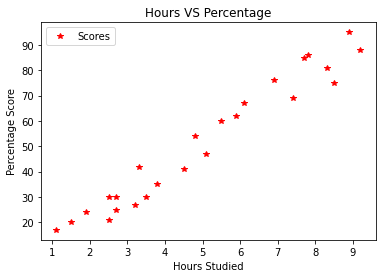

In [8]:
data.plot(x = "Hours" , y = "Scores" , style = "*",color="red")
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

**Observation** : There is a positive linear relation between hours studied and percentage score.

***Split the data into inputs(attributes) and outputs(labels)***

In [9]:
X = data.drop(["Scores"] , axis = 1)
y = data["Scores"]

In [10]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [11]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

# Splitting data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split   
   
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

#Data Modelling

Training Algorithm

In [13]:
from sklearn.linear_model import LinearRegression         
model = LinearRegression()
model.fit(X_train , y_train)
print("Training completed")

Training completed


In [14]:

print(model.coef_,model.intercept_)

[9.91065648] 2.018160041434662


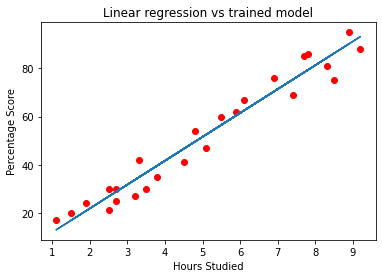

In [15]:
line = model.coef_*X+model.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(X,y,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(X,line)
plt.show()


**Prediction**

In [16]:
print(X_test)
y_pred = model.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


# Comparing the actual value to the predicted value

In [17]:
df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})
df

,Actual value,Predicted value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [18]:
#check the accuracy scores for training and test set
print("Training Score ",model.score(X_train,y_train))
print("Testing Score ",model.score(X_test,y_test))

Training Score  0.9515510725211553
Testing Score  0.9454906892105354


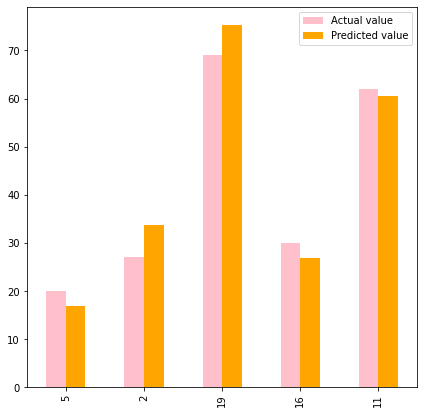

In [19]:
df.plot(kind='bar',figsize=(7,7),color=('pink','orange'))
plt.show()

# Predicting Scores for 9.25 hours of study

In [20]:

hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pred = model.predict([[9.5]])
print("NO. of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

NO. of hours = 9.25
Predicted Score = 96.16939660753593


# **Observation:** For 9.25 hours of study the predicted percentage scores is 96.169

In [24]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [25]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Model Evaluation Metrics
Evaluation metrics are a measure of how good a model performs and how well it approximates the relationship.

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_pred[:5])
mean_abs_error = mean_absolute_error(y_test, y_pred[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.598769307217456
Mean absolute Error: 4.183859899002982
